# Функции в Pandas
Примеры из презентации

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [9]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0], 'calculated': [False, False, True]})
df[['user_id', 'clicks', 'orders', 'calculated']]

,user_id,clicks,orders,calculated
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [12]:
def watcher(param):
    """Мне только посмотреть"""
    return param == 0

In [13]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,calculated,watcher
0,1,163,2,False,False
1,2,130,4,False,False
2,3,97,0,True,True


In [17]:
df['conv'] = df.apply(conversion, axis = 1)
df

,user_id,clicks,orders,calculated,watcher,conv
0,1,163,2,False,False,0.012270
1,2,130,4,False,False,0.030769
2,3,97,0,True,True,0.000000


Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [14]:
def conversion(row):
    """Подсчет конверсии переходов в покупки"""
    return row['orders'] / row['clicks']

### Как потестировать функцию со значениями одной строки

In [18]:
row1 = pd.DataFrame({'clicks': [163], 
                     'orders': [2], 
                     'user_id': [1]})
conversion(row1)

0    0.01227
dtype: float64

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [ ]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df[['user_id', 'clicks', 'orders']]

In [ ]:
df['conversion'] = df.apply(conversion, axis=1)

In [19]:
df[['user_id', 'clicks', 'orders', 'conversion']]

KeyError: "['conversion'] not in index"

### Как создавать столбцы с помощью функций

In [20]:
df = pd.DataFrame({'user_id': [1, 2, 3]})

In [21]:
df

,user_id
0,1
1,2
2,3


In [22]:
def metriks(row):
    """Возвращает новый столбец в зависимости от значения user_id"""
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id): 1})

In [23]:
df = df.apply(metriks, axis=1)
df

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


### Анализ рекламных кампаний

In [5]:
import pandas as pd 

In [6]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [7]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [8]:
phrase = 'МРТ на Менделеевской от 2000'

In [ ]:
len(phrase.split(' '))

In [ ]:
stats['word_count'] = stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

In [28]:
stats['word_count']=stats['phrase'].apply(lambda word: len(word.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [ ]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

In [30]:
stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)

Простая визуализация

In [31]:
%matplotlib inline

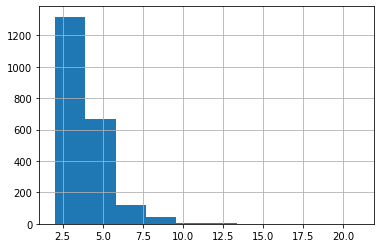

In [32]:
stats['word_count'].hist()

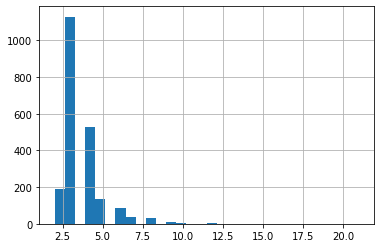

In [33]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [36]:
stats['word_count'].value_counts(normalize=True).head(5)

3    0.522927
4    0.245021
2    0.087541
5    0.063455
6    0.038907
Name: word_count, dtype: float64

### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [41]:
# пример ссылки
url = stats.loc[0, 'link']
parse.urlsplit(url)

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [38]:
from urllib import parse

In [39]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal#abc')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='abc')

In [42]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [43]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [44]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [45]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [46]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [47]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [48]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [49]:
# проверяем датафрейм
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [50]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


### Как передать в функцию несколько аргументов

In [ ]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [78]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.apply(lambda x: stats['group'].split(' ')[0])

NameError: name 'power_up' is not defined

In [ ]:
stats.apply(lambda x: x['group'].split(' ')[0])

### Упражнение
В наших данных есть много объявлений с услугой МРТ (в столбце group есть слово 'мрт') круглосуточно (в тексте объявления text есть '24 часа'). Отфильтруйте строки, в которых НЕ упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [98]:
def splt(x):
    return 'мрт' in x['group'].split(' ')  and  '24' in x['text'].split(' ') and 'часа.' in x['text'].split(' ')


In [106]:
stats['group1'] = stats.apply(splt, axis = 1)
len(stats[ stats['group1']== True])


2116

In [107]:
len(stats)

2159

# Группировки

In [108]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [110]:
df_russia = df[ df['country'] == 'Россия']
df_russia

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [112]:
df_china = df [ df['country'] == 'Китай']
df_china

,order_id,country,category,amount
1,2,Китай,Авто,80
2,3,Китай,Электроника,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [120]:
max(df_china['amount']), max(df_russia['amount'])


(90, 140)

In [121]:
max(df_china['amount']) - min(df_china['amount']), max(df_russia['amount']) - min(df_russia['amount'])

(10, 50)

Объединим процесс разбиения на датафреймы

In [127]:
def groupby_function(data):
    return data.amount.max() 

In [128]:
df.groupby('country').apply(groupby_function)

country
Китай      90
Россия    140
dtype: int64

Вернемся к статистике рекламных кампаний

In [ ]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

In [ ]:
# более универсальный способ

stats.groupby('campaign').count().head()

In [ ]:
stats.groupby('campaign').count()[['group', 'effect']].head()

### Как вернуть столбец из индекса - метод reset_index()

In [ ]:
stats.groupby('campaign').count().reset_index().head()

### К группировке можно применять разные функции такие образом:

In [130]:
obj = stats.groupby('campaign')

In [131]:
obj.max().head()

,group,phrase,effect,ad_id,title,text,link,word_count,group1
campaign,,,,,,,,,
034ada41b6,в недорого москва мрт,в москве открытого типа адрес мрт -цена,9.0,2428554779,Адрес МРТ открытого типа в Москве,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,7,True
03fcaecd1d,сделать мрт сущевский вал,сделать мрт стромынка,6.5,2101705759,Сделайте МРТ на ул. Стромынка!,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,True
0697a81555,мрт позвоночника сущевский вал,мрт позвоночника стромынка,5.5,2101706415,МРТ позвоночника на ул. Стромынка,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,True
08cdcb57a3,мрт сао,мрт сао -головы -москве -позвоночника -сделать...,7.4,2101705000,МРТ в САО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,7,True
0f0ba311fb,сделать мрт октябрьский,сделать мрт новослободская,6.4,2101705726,Сделайте МРТ на Новослободской,24 часа. От 2 000₽. Консультация врача бесплат...,https://awesome-site.ru/?utm_source=yandex&utm...,3,True


In [ ]:
obj.mean().head()

### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

In [145]:
stats.groupby('campaign').min('effect')

TypeError: f() takes 1 positional argument but 2 were given

In [144]:
a.sort_values('effect', ascending=True)

ValueError: No axis named effect for object type <class 'pandas.core.series.Series'>

### Несколько функций в группировках

In [ ]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

In [ ]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

### Как обращаться к вложенным столбцам

In [ ]:
results['effect']['max'].head()

In [ ]:
# или даже так
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max'].head()

In [ ]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

In [ ]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 